In [0]:
# Initial Setup for running notebook in Google Colab

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/ClassResources/NeuralNetworks')
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/ClassResources/NeuralNetworks'

### Intall Talos

In [0]:
import numpy as np

data = np.load('full-data-160.npz')
x, yr, yg, l = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print(len(x))
print(len(yr))
print(len(yg))
print(len(l))

23705
23705
23705
23705


In [0]:
import collections
def prepare_data(x, y, labels):
    counter = collections.Counter(y)
    print(counter)

    image_dict = {}
    label_dict = {}
    for index, image in enumerate(x):

      label_dict[hash(str(image))] = labels[index]
      if y[index] in image_dict:
        image_dict[y[index]].append(image)
      else:
        image_dict[y[index]] = [image]

    for key, val in image_dict.items():
      image_dict[key] = np.asarray(val)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for key, val in image_dict.items():
      split_index = int(len(val) * 0.9)

      sub_train = val[ : split_index]
      X_train.extend(sub_train)
      y_train.extend([key] * len(sub_train))

      sub_test = val[split_index : ]
      X_test.extend(sub_test)
      y_test.extend([key] * len(sub_test))

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)

    print(x.shape)
    print('Train')
    print(X_train.shape)
    print(y_train.shape)
    print('Testing')
    print(X_test.shape)
    print(y_test.shape)
    print(labels.shape)
    print(len(label_dict.items()))

    data = {}
    data['X_train'] = X_train
    data['y_train'] = y_train
    data['X_test'] = X_test
    data['y_test'] = y_test
    data['l_dict'] = label_dict

    return data

In [0]:
data = prepare_data(x, yg, l)
X_gender_train = data["X_train"]
Y_gender_train = data["y_train"]
X_gender_test = data["X_test"]
Y_gender_test = data["y_test"]
label_gender_dict = data["l_dict"]

data = prepare_data(x, yr, l)
X_race_train = data["X_train"]
Y_race_train = data["y_train"]
X_race_test = data["X_test"]
Y_race_test = data["y_test"]
label_race_dict = data["l_dict"]

Counter({0: 12391, 1: 11314})
(23705, 160, 160, 3)
Train
(21333, 160, 160, 3)
(21333,)
Testing
(2372, 160, 160, 3)
(2372,)
(23705,)
23291
Counter({0: 10078, 1: 4526, 3: 3975, 2: 3434, 4: 1692})
(23705, 160, 160, 3)
Train
(21332, 160, 160, 3)
(21332,)
Testing
(2373, 160, 160, 3)
(2373,)
(23705,)
23291


In [0]:
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

def get_embedding(model, face_pixels):
		face_pixels = face_pixels.astype('float32')
		mean, std = face_pixels.mean(), face_pixels.std()
		face_pixels = (face_pixels - mean) / std
		samples = expand_dims(face_pixels, axis=0)
		yhat = model.predict(samples)
		return yhat[0]
 
def save_embeddings(emtype, model, X_train, Y_train, X_test, Y_test):
		trainX, trainy, testX, testy = X_train, Y_train, X_test, Y_test
		print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
		newTrainX = list()
		for face_pixels in trainX:
			embedding = get_embedding(model, face_pixels)
			newTrainX.append(embedding)
		newTrainX = asarray(newTrainX)
		print(newTrainX.shape)
		newTestX = list()
		for face_pixels in testX:
			embedding = get_embedding(model, face_pixels)
			newTestX.append(embedding)
		newTestX = asarray(newTestX)
		print(newTestX.shape)
		savez_compressed(emtype + 'full-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)
		return trainX, trainy, testX, testy
 
model = load_model('facenet_keras.h5')
print('Loaded Model')

xgtrain, ygtrain, xgtest, ygtest = save_embeddings('gender', model, X_gender_train, Y_gender_train, X_gender_test, Y_gender_test)
xrtrain, yrtrain, xrtest, yrtest = save_embeddings('race', model, X_race_train, Y_race_train, X_race_test, Y_race_test)

Using TensorFlow backend.














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
Loaded:  (21333, 160, 160, 3) (21333,) (2372, 160, 160, 3) (2372,)
(21333, 128)
(2372, 128)
Loaded:  (21332, 160, 160, 3) (21332,) (2373, 160, 160, 3) (2373,)
(21332, 128)
(2373, 128)


In [0]:
import numpy as np

data = np.load('genderfull-faces-embeddings.npz')
xgtrain, ygtrain, xgtest, ygtest = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset gender: train=%d, test=%d' % (xgtrain.shape[0], xgtest.shape[0]))

data = np.load('racefull-faces-embeddings.npz')
xrtrain, yrtrain, xrval, yrval, xrtest, yrtest = data['arr_0'], data['arr_1'], data['arr_2'][:-10], data['arr_3'][:-10], data['arr_2'][-10:], data['arr_3'][-10:]
print('Dataset race: train=%d, val=%d, test=%d' % (xrtrain.shape[0], xrval.shape[0], xrtest.shape[0]))

Dataset gender: train=21333, test=2372
Dataset race: train=21332, val=2363, test=10


In [0]:
from keras import Sequential
from keras.layers import *
from keras.regularizers import l2
from keras import optimizers

def build_g_fn():
    model = Sequential()

    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(2, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("softmax"))

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizers.Adam(lr=1e-5),
        metrics=['accuracy'],
    )
    return model

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

g_clf = KerasClassifier(build_g_fn, epochs=500, batch_size=64)
g_history = g_clf.fit(xgtrain, ygtrain, validation_split=0.2, shuffle=True)

Train on 17066 samples, validate on 4267 samples
Epoch 1/500
17066/17066 [==============================] - 5s 309us/step - loss: 10.9092 - acc: 0.4989 - val_loss: 10.7710 - val_acc: 0.3722
Epoch 2/500
17066/17066 [==============================] - 3s 184us/step - loss: 10.7798 - acc: 0.5108 - val_loss: 10.6409 - val_acc: 0.4061
Epoch 3/500
17066/17066 [==============================] - 3s 185us/step - loss: 10.6540 - acc: 0.5116 - val_loss: 10.5134 - val_acc: 0.4303
Epoch 4/500
17066/17066 [==============================] - 3s 182us/step - loss: 10.5306 - acc: 0.5197 - val_loss: 10.3955 - val_acc: 0.4462
Epoch 5/500
17066/17066 [==============================] - 3s 183us/step - loss: 10.4090 - acc: 0.5251 - val_loss: 10.2736 - val_acc: 0.4659
Epoch 6/500
17066/17066 [==============================] - 3s 180us/step - loss: 10.2845 - acc: 0.5286 - val_loss: 10.1424 - val_acc: 0.5055
Epoch 7/500
17066/17066 [==============================] - 3s 183us/step - loss: 10.1618 - acc: 0.5383 - 

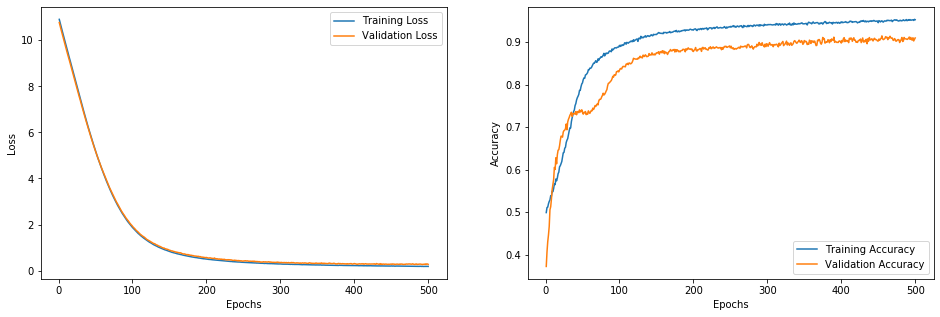

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 5)

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(1, len(g_history.history['loss'])+1), g_history.history['loss'], label='Training Loss')
plt.plot(range(1, len(g_history.history['val_loss'])+1), g_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(g_history.history['acc'])+1), g_history.history['acc'], label='Training Accuracy')
plt.plot(range(1, len(g_history.history['val_acc'])+1), g_history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
fig.savefig('gender_training.png', dpi=fig.dpi)

In [0]:
# tfrom sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# gresults = cross_val_score(g_clf, xgtrain, ygtrain, cv=kfold, verbose=0, n_jobs=-1)
# print("Baseline: %.2f%% (%.2f%%)" % (gresults.mean()*100, gresults.std()*100))

In [0]:
from sklearn.metrics import accuracy_score

gtesty_pred = g_clf.predict(xgtest)
gscore = accuracy_score(ygtest, gtesty_pred)
print(gscore*100)

93.71838111298483


In [0]:
from matplotlib import pyplot
from random import choice

def plotExampleFaces(clf, X_test, X_test_em, Y_test, human_readable_labels, filename_dict):
    testX_faces = X_test
    testX = X_test_em
    label_dict = filename_dict
    labels = human_readable_labels
    for i in range(10):

        selection = choice([i for i in range(testX_faces.shape[0])])
        random_face_pixels = testX_faces[selection]
        random_face_emb = testX[selection]
        random_face_class = Y_test[selection]

        samples = expand_dims(random_face_emb, axis=0)
        yhat_class = clf.predict(samples)
        yhat_prob = clf.predict_proba(samples)

        class_index = yhat_class[0]
        class_probability = yhat_prob[0, class_index] * 100

        print('Predicted: %s %s (%.3f)' % (labels[yhat_class[0]], yhat_class[0], class_probability))
        print('Expected: %s %s' % (labels[random_face_class], random_face_class))
        print('Label: %s' % label_dict[hash(str(random_face_pixels))])

        pyplot.imshow(random_face_pixels[:,:,::-1])
        title = '%s (%.3f)' % (yhat_class[0], class_probability)
        pyplot.title(title)
        pyplot.show()

Predicted: Female 1 (99.273)
Expected: Female 1
Label: 60_1_1_20170110122351600.jpg.chip.jpg


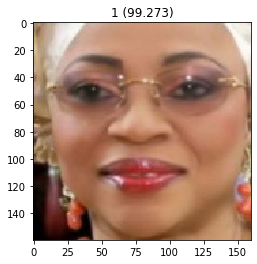

Predicted: Male 0 (99.122)
Expected: Male 0
Label: 36_0_3_20170117183132325.jpg.chip.jpg


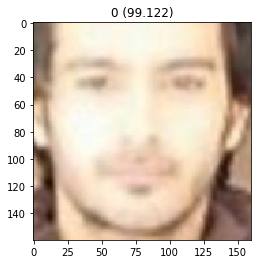

Predicted: Male 0 (86.814)
Expected: Male 0
Label: 28_0_2_20170116180337639.jpg.chip.jpg


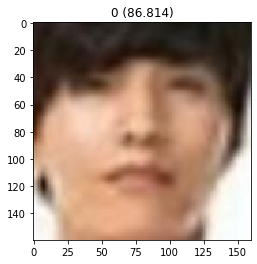

Predicted: Male 0 (99.161)
Expected: Male 0
Label: 26_0_3_20170117153033332.jpg.chip.jpg


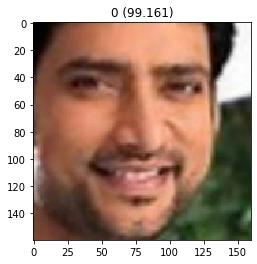

Predicted: Female 1 (98.132)
Expected: Female 1
Label: 27_1_0_20170116173136538.jpg.chip.jpg


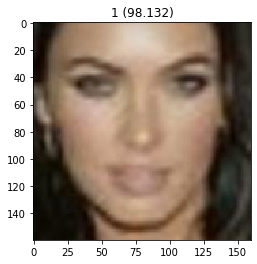

Predicted: Female 1 (99.315)
Expected: Female 1
Label: 32_1_0_20170116221804392.jpg.chip.jpg


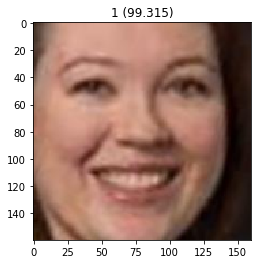

Predicted: Male 0 (98.828)
Expected: Male 0
Label: 36_0_1_20170116200634306.jpg.chip.jpg


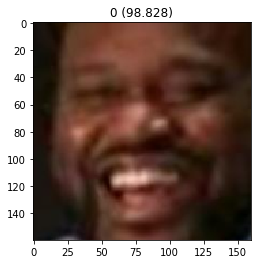

Predicted: Female 1 (98.696)
Expected: Female 1
Label: 35_1_1_20170117154027218.jpg.chip.jpg


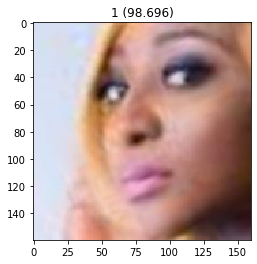

Predicted: Male 0 (98.686)
Expected: Male 0
Label: 26_0_1_20170117195651493.jpg.chip.jpg


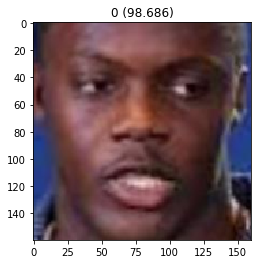

Predicted: Male 0 (99.090)
Expected: Male 0
Label: 35_0_3_20170104214739069.jpg.chip.jpg


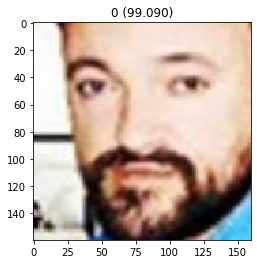

In [0]:
human_readable_labels = {
    0: 'Male',
    1: 'Female',
}
plotExampleFaces(g_clf, X_gender_test, xgtest, Y_gender_test, human_readable_labels, label_gender_dict)

In [0]:
from keras.models import model_from_json
from keras.utils import to_categorical

# # serialize model to JSON
# g_model_json = g_clf.model.to_json()
# with open("gender_model.json", "w") as json_file:
#     json_file.write(g_model_json)
# # serialize weights to HDF5
# g_clf.model.save_weights("val_gender_model.h5")
# print("Saved model to disk")

# LATER
# load json and create model
json_file = open('gender_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("gender_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
onehotygtest = to_categorical(ygtest)
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(xgtest, onehotygtest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Loaded model from disk


acc: 94.22%


In [0]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_2 (Activation)    (None, 100)              

In [0]:
from sklearn.metrics import confusion_matrix

gtesty_pred = loaded_model.predict(xgtest)
cm = confusion_matrix(ygtest, gtesty_pred.argmax(axis=1))

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.93548387, 0.94964664])

In [0]:
from sklearn.metrics import classification_report

gtesty_pred = loaded_model.predict(xgtest)
target_names = ['Male', 'Female']
print(classification_report(ygtest, gtesty_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

        Male       0.95      0.94      0.94      1240
      Female       0.93      0.95      0.94      1132

    accuracy                           0.94      2372
   macro avg       0.94      0.94      0.94      2372
weighted avg       0.94      0.94      0.94      2372



In [0]:
import os
import cv2
import numpy as np
from PIL import Image, ImageOps

imgArray = []
readable_labels = []

for imageName in os.listdir("faces"):
    name = "faces/" + imageName
    img = cv2.imread(name)
    try:
        readable_labels.append(imageName)
        img = cv2.resize(img, (160, 160))
        imgArray.append(img)
    except:
        print("dummy")

faceArray = np.array(imgArray)
nameArray = np.array(readable_labels)
print(faceArray.shape)

(29, 160, 160, 3)


In [0]:
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

def convert(model, images):
    embeddings = list()
    for face in images:
        embeddings.append(get_embedding(model, face))
    return asarray(embeddings)

 
model = load_model('facenet_keras.h5')
print('Loaded Model')
face_embeddings = convert(model, faceArray)
print(face_embeddings.shape)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
(29, 128)


2
Predicted: Male 0 (98.848)
Expected: g2_6_Black_Male.jpg


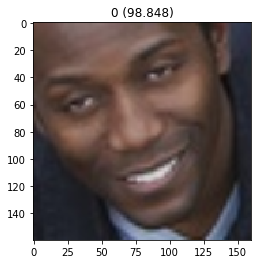

2
Predicted: Female 1 (97.806)
Expected: g2_7_Asian_Female.jpg


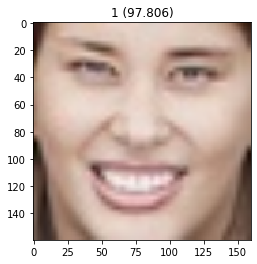

2
Predicted: Male 0 (97.868)
Expected: g2_8_White_Male.jpg


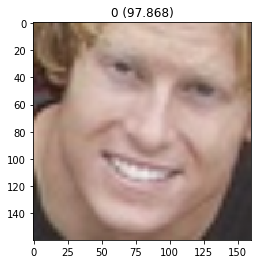

2
Predicted: Female 1 (99.193)
Expected: g2_9_White_Female.jpg


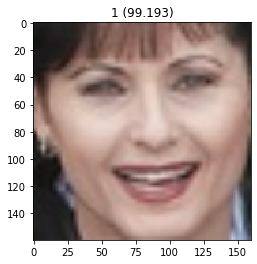

2
Predicted: Male 0 (94.851)
Expected: g2_19_White_Male.jpg


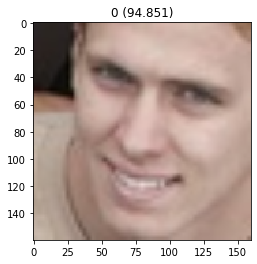

2
Predicted: Female 1 (89.735)
Expected: g2_11_Black_Female.jpg


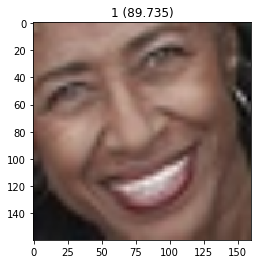

2
Predicted: Female 1 (96.862)
Expected: g2_13_Black_Female.jpg


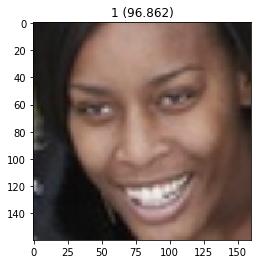

2
Predicted: Male 0 (98.575)
Expected: g2_10_White_Male.jpg


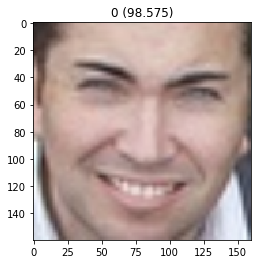

2
Predicted: Female 1 (98.467)
Expected: g2_12_Black_Female.jpg


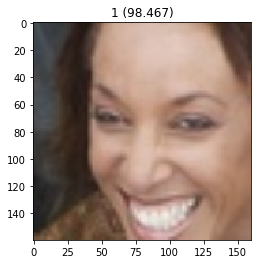

2
Predicted: Female 1 (97.765)
Expected: g2_14_Asian_Female.jpg


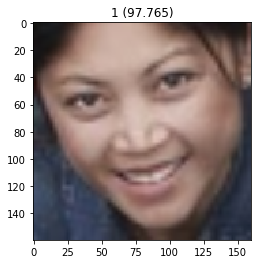

2
Predicted: Female 1 (93.472)
Expected: g2_16_Asian_Female.jpg


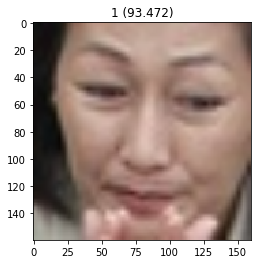

2
Predicted: Male 0 (95.673)
Expected: g2_17_White_Male.jpg


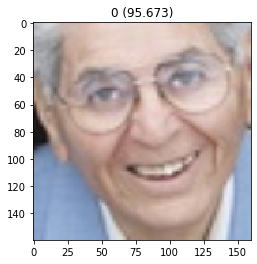

2
Predicted: Female 1 (99.189)
Expected: g2_18_White_Female.jpg


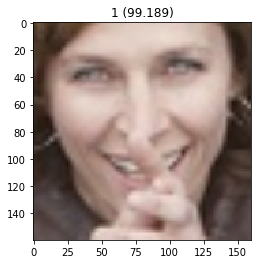

2
Predicted: Female 1 (92.001)
Expected: g2_15_Black_Female.jpg


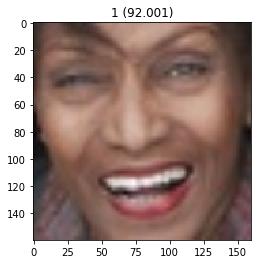

2
Predicted: Male 0 (99.293)
Expected: g2_20_White_Male.jpg


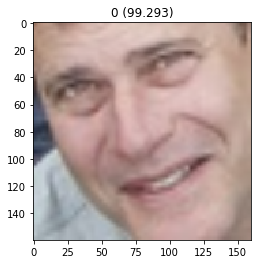

2
Predicted: Male 0 (98.601)
Expected: g2_22_Asian_Male.jpg


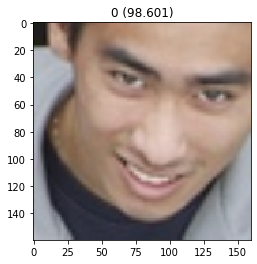

2
Predicted: Male 0 (99.067)
Expected: g2_21_Black_Male.jpg


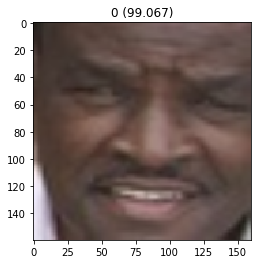

2
Predicted: Male 0 (97.865)
Expected: g2_23_White_Male.jpg


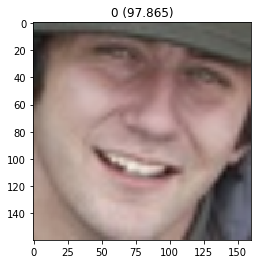

2
Predicted: Female 1 (96.800)
Expected: g2_25_White_Female.jpg


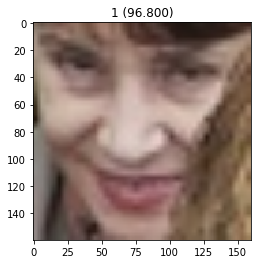

2
Predicted: Male 0 (93.287)
Expected: g2_24_Asian_Male.jpg


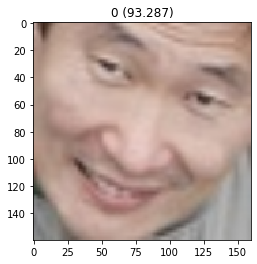

2
Predicted: Female 1 (95.115)
Expected: g3_0_White_Female.jpg


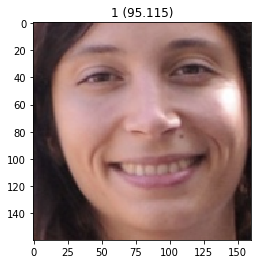

2
Predicted: Female 1 (98.888)
Expected: g2_26_Asian_Female.jpg


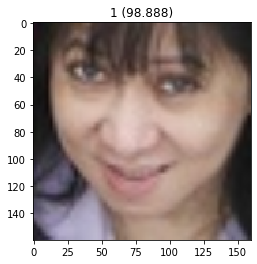

2
Predicted: Female 1 (98.268)
Expected: g3_1_Indian_Female.jpg


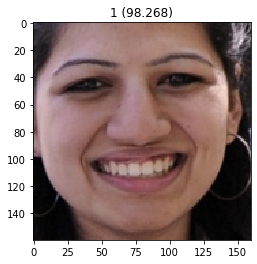

2
Predicted: Male 0 (95.318)
Expected: g2_27_Black_Male.jpg


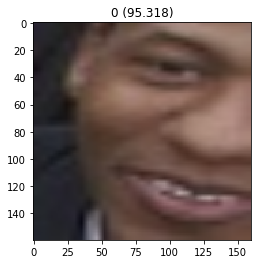

2
Predicted: Male 0 (99.132)
Expected: g3_3_White_Male.jpg


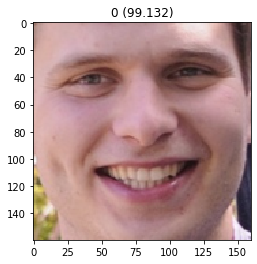

2
Predicted: Male 0 (97.796)
Expected: g3_2_White_Male.jpg


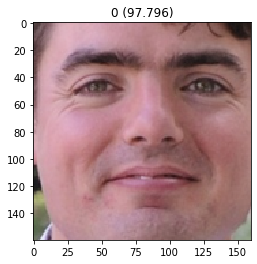

2
Predicted: Male 0 (77.215)
Expected: g3_6_White_Male.jpg


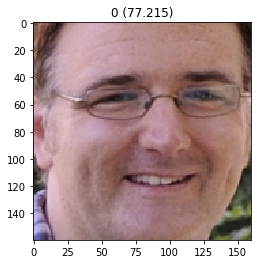

2
Predicted: Male 0 (97.696)
Expected: g3_5_Asian_Male.jpg


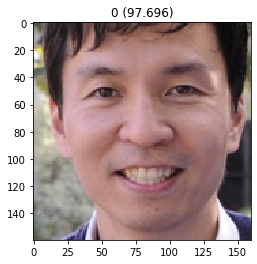

2
Predicted: Male 0 (98.796)
Expected: g3_4_White_Male.jpg


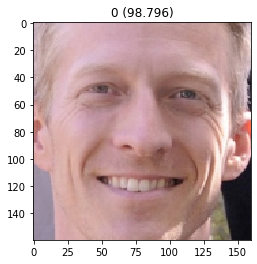

In [0]:
from matplotlib import pyplot

labels = loaded_model.predict(face_embeddings)
prob = loaded_model.predict_proba(face_embeddings)
human_readable_labels = {
    0: 'Male',
    1: 'Female',
}

for index in range(len(faceArray)):
    random_face_pixels = faceArray[index]
    random_face_emb = face_embeddings[index]
    random_face_class = nameArray[index]

    samples = expand_dims(random_face_emb, axis=0)
    print(len(labels[index]))
    yhat_class = labels[index].argmax()
    class_probability = np.max(prob[index]) * 100

    print('Predicted: %s %s (%.3f)' % (human_readable_labels[yhat_class], yhat_class, class_probability))
    print('Expected: %s' % (random_face_class))

    pyplot.imshow(random_face_pixels[:,:,::-1])
    title = '%s (%.3f)' % (yhat_class, class_probability)
    pyplot.title(title)
    pyplot.show()

In [0]:
from keras import Sequential
from keras.layers import *
from keras.regularizers import l2
from keras import optimizers

def build_r_fn():
    model = Sequential()

    model.add(Dense(200, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dropout(0.2))
    model.add(Dense(5, kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation("softmax"))

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizers.RMSprop(lr=1e-5, decay=1e-6),
        metrics=['accuracy'],
    )
    return model

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

onehotyrval = to_categorical(yrval)

r_clf = KerasClassifier(build_r_fn, epochs=500, batch_size=32)
r_history = r_clf.fit(xrtrain, yrtrain, validation_data=(xrval, onehotyrval), shuffle=True)

Train on 21332 samples, validate on 2363 samples
Epoch 1/500
21332/21332 [==============================] - 14s 643us/step - loss: 13.9686 - acc: 0.2215 - val_loss: 13.6969 - val_acc: 0.1887
Epoch 2/500
21332/21332 [==============================] - 10s 479us/step - loss: 13.7067 - acc: 0.2399 - val_loss: 13.4584 - val_acc: 0.2226
Epoch 3/500
21332/21332 [==============================] - 10s 478us/step - loss: 13.4346 - acc: 0.2694 - val_loss: 13.2187 - val_acc: 0.2666
Epoch 4/500
21332/21332 [==============================] - 10s 471us/step - loss: 13.1703 - acc: 0.2960 - val_loss: 12.9787 - val_acc: 0.3068
Epoch 5/500
21332/21332 [==============================] - 10s 480us/step - loss: 12.9066 - acc: 0.3264 - val_loss: 12.7472 - val_acc: 0.3237
Epoch 6/500
21332/21332 [==============================] - 10s 482us/step - loss: 12.6401 - acc: 0.3547 - val_loss: 12.4928 - val_acc: 0.3661
Epoch 7/500
21332/21332 [==============================] - 10s 491us/step - loss: 12.3836 - acc: 0.

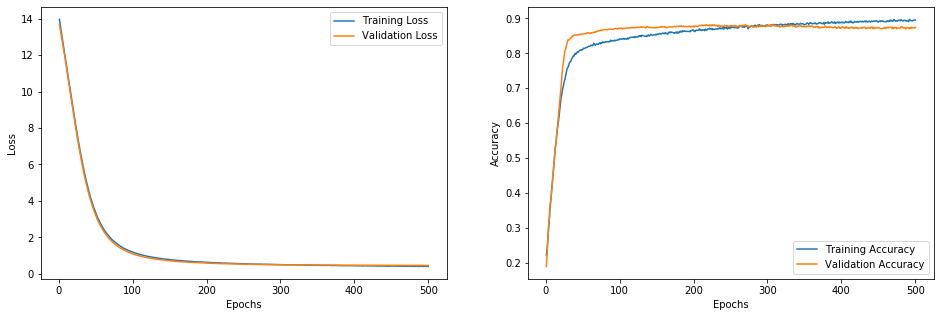

In [0]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 5)

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(1, len(r_history.history['loss'])+1), r_history.history['loss'], label='Training Loss')
plt.plot(range(1, len(r_history.history['val_loss'])+1), r_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(r_history.history['acc'])+1), r_history.history['acc'], label='Training Accuracy')
plt.plot(range(1, len(r_history.history['val_acc'])+1), r_history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
fig.savefig('race_training.png', dpi=fig.dpi)

In [0]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# rresults = cross_val_score(r_clf, xrtrain, yrtrain, cv=kfold, verbose=0, n_jobs=-1)
# print("Baseline: %.2f%% (%.2f%%)" % (rresults.mean()*100, rresults.std()*100))

In [0]:
from sklearn.metrics import accuracy_score

rtesty_pred = r_clf.predict(xrval)
rscore = accuracy_score(yrval, rtesty_pred)
print(rscore*100)

87.43123148539992


In [0]:
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

Predicted: White 0 (52.971)
Expected: Indian 3
Label: 56_0_3_20170117191908449.jpg.chip.jpg


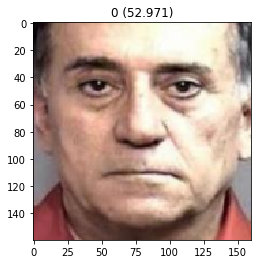

Predicted: Asian 2 (98.101)
Expected: Asian 2
Label: 1_0_2_20161219212444782.jpg.chip.jpg


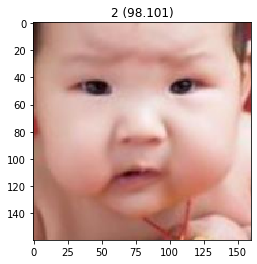

Predicted: Black 1 (96.675)
Expected: Black 1
Label: 26_1_1_20170116024031179.jpg.chip.jpg


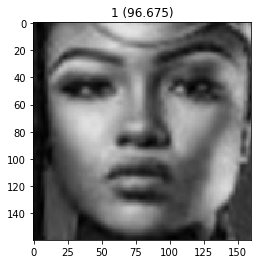

Predicted: White 0 (96.754)
Expected: White 0
Label: 51_1_0_20170117173726343.jpg.chip.jpg


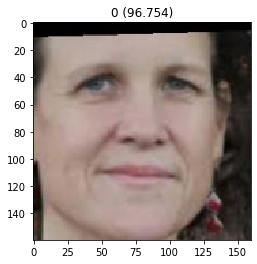

Predicted: Black 1 (96.220)
Expected: Black 1
Label: 56_0_1_20170113151815760.jpg.chip.jpg


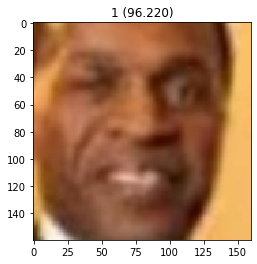

Predicted: Asian 2 (96.789)
Expected: Asian 2
Label: 1_0_2_20161219203724580.jpg.chip.jpg


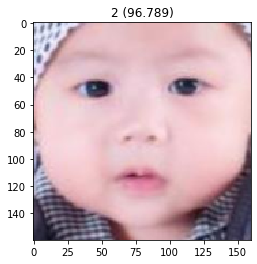

Predicted: Indian 3 (85.832)
Expected: Indian 3
Label: 8_0_3_20170104230746993.jpg.chip.jpg


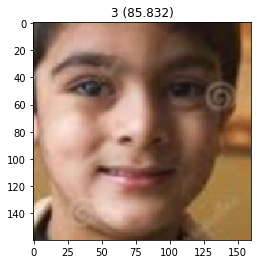

Predicted: White 0 (93.534)
Expected: White 0
Label: 26_0_0_20170117170706453.jpg.chip.jpg


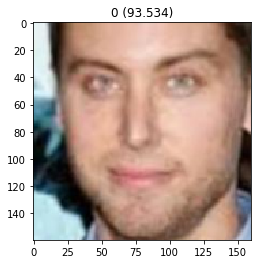

Predicted: Indian 3 (96.858)
Expected: Indian 3
Label: 18_1_3_20170109213106901.jpg.chip.jpg


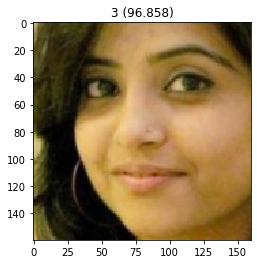

Predicted: Asian 2 (96.309)
Expected: Asian 2
Label: 29_1_2_20170109133107871.jpg.chip.jpg


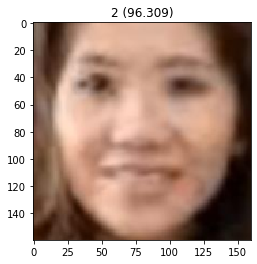

In [0]:
r_human_readable_labels = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Other'
}
plotExampleFaces(r_clf, X_race_test, xrtest, Y_race_test, r_human_readable_labels, label_race_dict)

In [0]:
# # serialize model to JSON
# r_model_json = r_clf.model.to_json()
# with open("val_race_model.json", "w") as json_file:
#     json_file.write(r_model_json)
# # serialize weights to HDF5
# r_clf.model.save_weights("val_race_model.h5")
# print("Saved model to disk")

# LATER
# load json and create model
json_file = open('race_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("race_model.h5")
print("Loaded model from disk")
 
onehotyrtest = to_categorical(yrtest, num_classes=5)

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(xrtest, onehotyrtest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 100.00%


In [0]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 200)               25800     
_________________________________________________________________
batch_normalization_27 (Batc (None, 200)               800       
_________________________________________________________________
activation_27 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_28 (Batc (None, 100)               400       
_________________________________________________________________
activation_28 (Activation)   (None, 100)              

Predicted: Black 1 (98.314)
Expected: g2_6_Black_Male.jpg


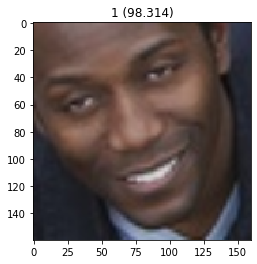

Predicted: Asian 2 (90.566)
Expected: g2_7_Asian_Female.jpg


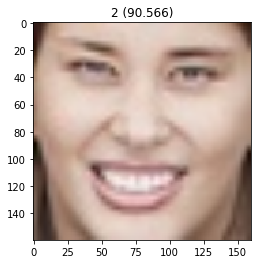

Predicted: White 0 (96.562)
Expected: g2_8_White_Male.jpg


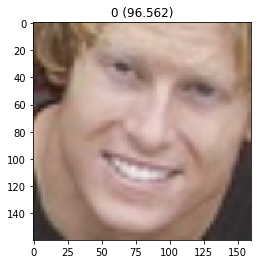

Predicted: White 0 (92.535)
Expected: g2_9_White_Female.jpg


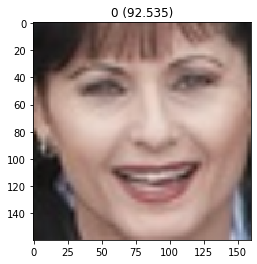

Predicted: White 0 (96.128)
Expected: g2_19_White_Male.jpg


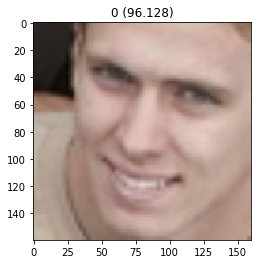

Predicted: Asian 2 (87.350)
Expected: g2_11_Black_Female.jpg


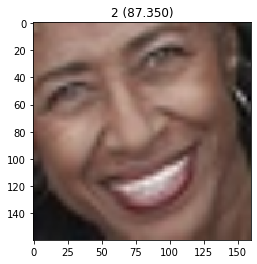

Predicted: Black 1 (95.172)
Expected: g2_13_Black_Female.jpg


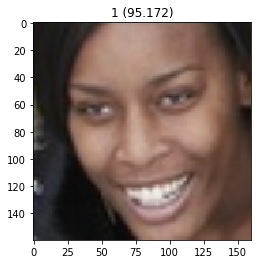

Predicted: White 0 (90.983)
Expected: g2_10_White_Male.jpg


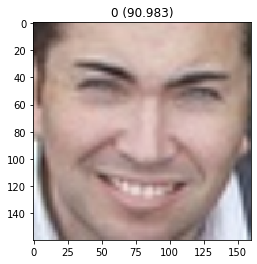

Predicted: Black 1 (49.167)
Expected: g2_12_Black_Female.jpg


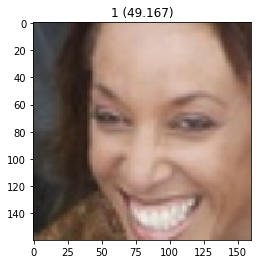

Predicted: Asian 2 (43.299)
Expected: g2_14_Asian_Female.jpg


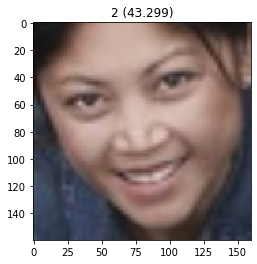

Predicted: Asian 2 (98.772)
Expected: g2_16_Asian_Female.jpg


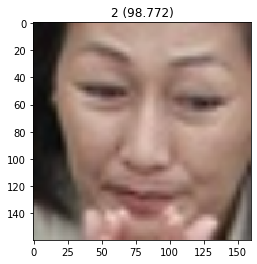

Predicted: White 0 (92.188)
Expected: g2_17_White_Male.jpg


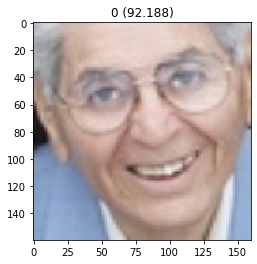

Predicted: White 0 (96.480)
Expected: g2_18_White_Female.jpg


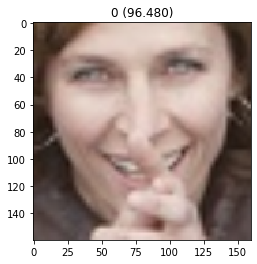

Predicted: Black 1 (54.237)
Expected: g2_15_Black_Female.jpg


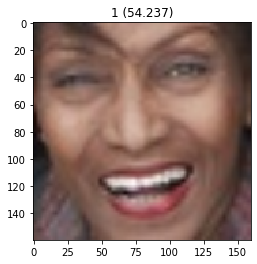

Predicted: White 0 (96.577)
Expected: g2_20_White_Male.jpg


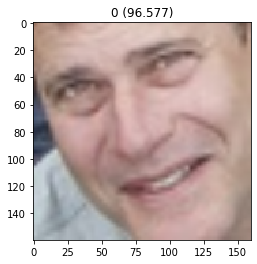

Predicted: Asian 2 (97.662)
Expected: g2_22_Asian_Male.jpg


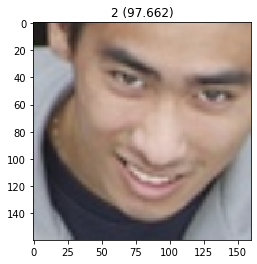

Predicted: Black 1 (97.362)
Expected: g2_21_Black_Male.jpg


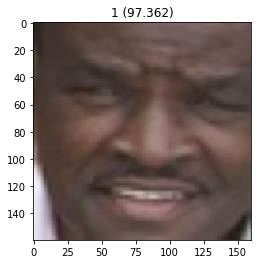

Predicted: White 0 (95.662)
Expected: g2_23_White_Male.jpg


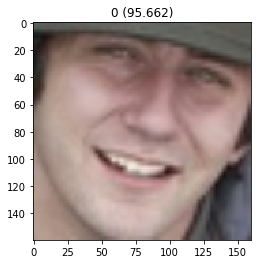

Predicted: White 0 (86.934)
Expected: g2_25_White_Female.jpg


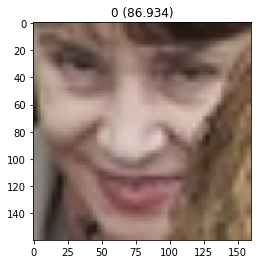

Predicted: Asian 2 (99.003)
Expected: g2_24_Asian_Male.jpg


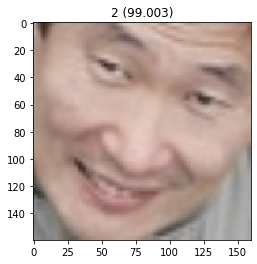

Predicted: White 0 (89.939)
Expected: g3_0_White_Female.jpg


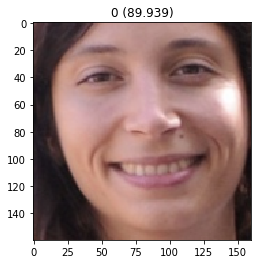

Predicted: Asian 2 (72.538)
Expected: g2_26_Asian_Female.jpg


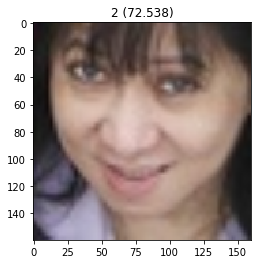

Predicted: Indian 3 (94.516)
Expected: g3_1_Indian_Female.jpg


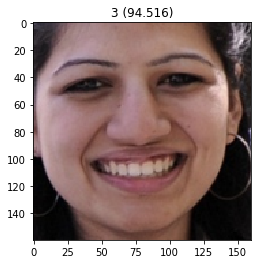

Predicted: Black 1 (96.724)
Expected: g2_27_Black_Male.jpg


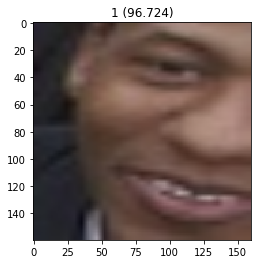

Predicted: White 0 (96.764)
Expected: g3_3_White_Male.jpg


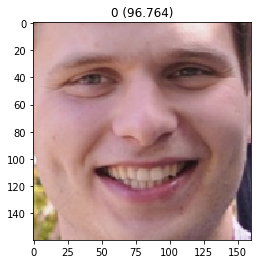

Predicted: White 0 (91.376)
Expected: g3_2_White_Male.jpg


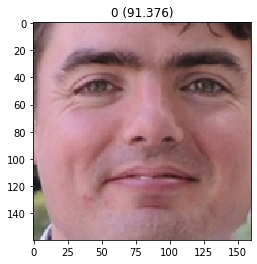

Predicted: White 0 (96.553)
Expected: g3_6_White_Male.jpg


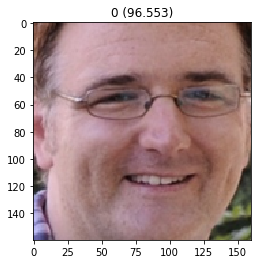

Predicted: Asian 2 (97.869)
Expected: g3_5_Asian_Male.jpg


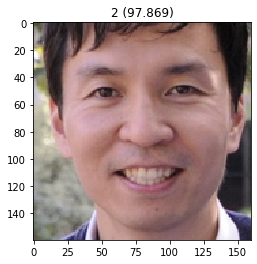

Predicted: White 0 (96.736)
Expected: g3_4_White_Male.jpg


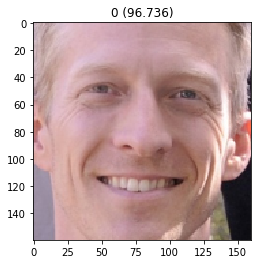

In [0]:
from matplotlib import pyplot

labels = loaded_model.predict(face_embeddings)
prob = loaded_model.predict_proba(face_embeddings)
r_human_readable_labels = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Other'
}

for index in range(len(faceArray)):
    random_face_pixels = faceArray[index]
    random_face_emb = face_embeddings[index]
    random_face_class = nameArray[index]

    samples = expand_dims(random_face_emb, axis=0)
    yhat_class = labels[index].argmax()
    yhat_prob = np.max(prob[index])
    class_probability = yhat_prob * 100

    print('Predicted: %s %s (%.3f)' % (r_human_readable_labels[yhat_class], yhat_class, class_probability))
    print('Expected: %s' % (random_face_class))

    pyplot.imshow(random_face_pixels[:,:,::-1])
    title = '%s (%.3f)' % (yhat_class, class_probability)
    pyplot.title(title)
    pyplot.show()

In [0]:
from sklearn.metrics import confusion_matrix

rtesty_pred = loaded_model.predict(data['arr_2'])
cm = confusion_matrix(data['arr_3'], rtesty_pred.argmax(axis=1))
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm.diagonal())

[[928  18   5  29  28]
 [  8 422   3  11   9]
 [ 16   1 319   5   3]
 [ 24   8   3 351  12]
 [ 68  11  11  26  54]]
[0.92063492 0.93156733 0.92732558 0.88190955 0.31764706]


In [0]:
print(data['arr_2'].shape)
print(data['arr_3'].shape)

(2373, 128)
(2373,)
